<a href="https://colab.research.google.com/github/hetpatel007/Het_Special_Topics/blob/main/Copy_of_Independent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


What are the key socio-economic, healthcare, environmental, and psychological factors influencing life expectancy and happiness across South American countries, and how do these factors differ between high and low-performing countries in the region?

In [3]:
# Replace 'your_file.dta' with the path to your Stata file
file_path =  'https://drive.google.com/uc?export=download&id=1Qnx5xrpgey8G6XW3_s2trMMStMmWCVek'

data_1 = pd.read_csv(file_path)

In [4]:
data_1.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [5]:
# Select the relevant columns and rename 'Life Ladder' to 'Happiness'
Happiness = data_1[['Country name', 'year', 'Life Ladder', 'Perceptions of corruption','Social support','Log GDP per capita','Generosity','Freedom to make life choices']].copy()

# Rename columns
Happiness.rename(columns={'Life Ladder': 'Happiness', 'Perceptions of corruption': 'Perception of Corruption','Country name':'Country'}, inplace=True)

# Display the first 5 rows of the modified dataset
print(Happiness.head())

       Country  year  Happiness  Perception of Corruption  Social support  \
0  Afghanistan  2008      3.724                     0.882           0.451   
1  Afghanistan  2009      4.402                     0.850           0.552   
2  Afghanistan  2010      4.758                     0.707           0.539   
3  Afghanistan  2011      3.832                     0.731           0.521   
4  Afghanistan  2012      3.783                     0.776           0.521   

   Log GDP per capita  Generosity  Freedom to make life choices  
0               7.370       0.168                         0.718  
1               7.540       0.190                         0.679  
2               7.647       0.121                         0.600  
3               7.620       0.162                         0.496  
4               7.705       0.236                         0.531  


#Filter data for south american countries

In [6]:
# List of South American countries
south_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

# Filter the dataset to include only South American countries
Happiness_South_America = Happiness[Happiness['Country'].isin(south_american_countries)]

# Display the first few rows of the filtered dataset
print(Happiness_South_America.head())


      Country  year  Happiness  Perception of Corruption  Social support  \
37  Argentina  2006      6.313                     0.852           0.938   
38  Argentina  2007      6.073                     0.881           0.862   
39  Argentina  2008      5.961                     0.865           0.892   
40  Argentina  2009      6.424                     0.885           0.919   
41  Argentina  2010      6.441                     0.855           0.927   

    Log GDP per capita  Generosity  Freedom to make life choices  
37               9.942      -0.157                         0.733  
38              10.018      -0.141                         0.653  
39              10.048      -0.132                         0.678  
40               9.977      -0.130                         0.637  
41              10.066      -0.126                         0.730  


Descriptive stats

In [7]:
# Generate descriptive statistics for the filtered dataset
descriptive_stats = Happiness_South_America.describe()

# Print the descriptive statistics
print(descriptive_stats)

              year   Happiness  Perception of Corruption  Social support  \
count   149.000000  149.000000                149.000000      149.000000   
mean   2012.805369    6.055221                  0.785369        0.868591   
std       4.311640    0.555693                  0.095972        0.048694   
min    2005.000000    4.041000                  0.471000        0.756000   
25%    2009.000000    5.713000                  0.741000        0.829000   
50%    2013.000000    6.062000                  0.812000        0.883000   
75%    2016.000000    6.449000                  0.855000        0.906000   
max    2020.000000    7.478000                  0.931000        0.959000   

       Log GDP per capita  Generosity  Freedom to make life choices  
count          146.000000  143.000000                    149.000000  
mean             9.520541   -0.066315                      0.775054  
std              0.373433    0.096861                      0.085986  
min              8.686000   -0.2260

Happiness over the years

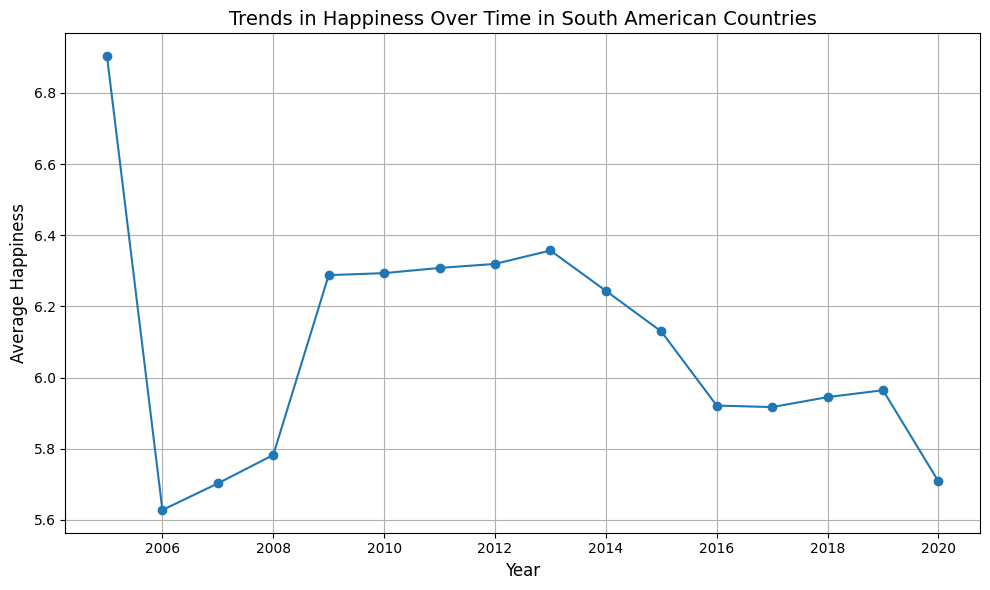

In [8]:
import matplotlib.pyplot as plt

# Grouping the data by year and calculating the mean happiness score for each year
happiness_trends = Happiness_South_America.groupby('year')['Happiness'].mean()

# Plotting the trends in happiness over time
plt.figure(figsize=(10, 6))
plt.plot(happiness_trends.index, happiness_trends.values, marker='o')

# Adding titles and labels
plt.title('Trends in Happiness Over Time in South American Countries', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Happiness', fontsize=12)

# Display grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Filter the data for the year 2006
data_2006 = Happiness_South_America[Happiness_South_America['year'] == 2006]

# Display the data for 2006
print(data_2006)

# Calculate the mean happiness score for 2006
mean_happiness_2006 = data_2006['Happiness'].mean()
print(f"Mean Happiness in 2006: {mean_happiness_2006}")



        Country  year  Happiness  Perception of Corruption  Social support  \
37    Argentina  2006      6.313                     0.852           0.938   
178     Bolivia  2006      5.374                     0.794           0.834   
327       Chile  2006      6.063                     0.634           0.836   
357    Colombia  2006      6.025                     0.808           0.910   
483     Ecuador  2006      5.024                     0.901           0.910   
1353   Paraguay  2006      4.730                     0.841           0.895   
1366       Peru  2006      4.811                     0.895           0.875   
1851    Uruguay  2006      5.786                     0.477           0.912   
1880  Venezuela  2006      6.525                     0.646           0.946   

      Log GDP per capita  Generosity  Freedom to make life choices  
37                 9.942      -0.157                         0.733  
178                8.686      -0.044                         0.770  
327         

In [10]:
# Filter the dataset for the year 2006
data_2006 = Happiness_South_America[Happiness_South_America['year'] == 2006]

# Find the country with the lowest happiness score in 2006
lowest_happiness_2006 = data_2006.loc[data_2006['Happiness'].idxmin()]

# Display the country with the lowest happiness score
print(f"Country with the lowest happiness score in 2006: {lowest_happiness_2006['Country']}")
print(f"Happiness score: {lowest_happiness_2006['Happiness']}")


Country with the lowest happiness score in 2006: Paraguay
Happiness score: 4.73


In [11]:
import plotly.express as px

# Grouping the data by country and calculating the mean happiness for each country
happiness_by_country = Happiness_South_America.groupby('Country')['Happiness'].mean().sort_values()

# Creating an interactive bar chart
fig = px.bar(happiness_by_country,
             x=happiness_by_country.index,
             y='Happiness',
             title='Average Happiness by Country in South America',
             labels={'Happiness': 'Average Happiness', 'index': 'Country'},
             text_auto=True)

# Updating layout for better readability
fig.update_layout(xaxis_title="Country", yaxis_title="Average Happiness",
                  xaxis_tickangle=-45, height=600, width=1000)

# Show the interactive plot
fig.show()


Cooruption over the years

Descriptive Statistics for Perception of Corruption:
count    149.000000
mean       0.785369
std        0.095972
min        0.471000
25%        0.741000
50%        0.812000
75%        0.855000
max        0.931000
Name: Perception of Corruption, dtype: float64


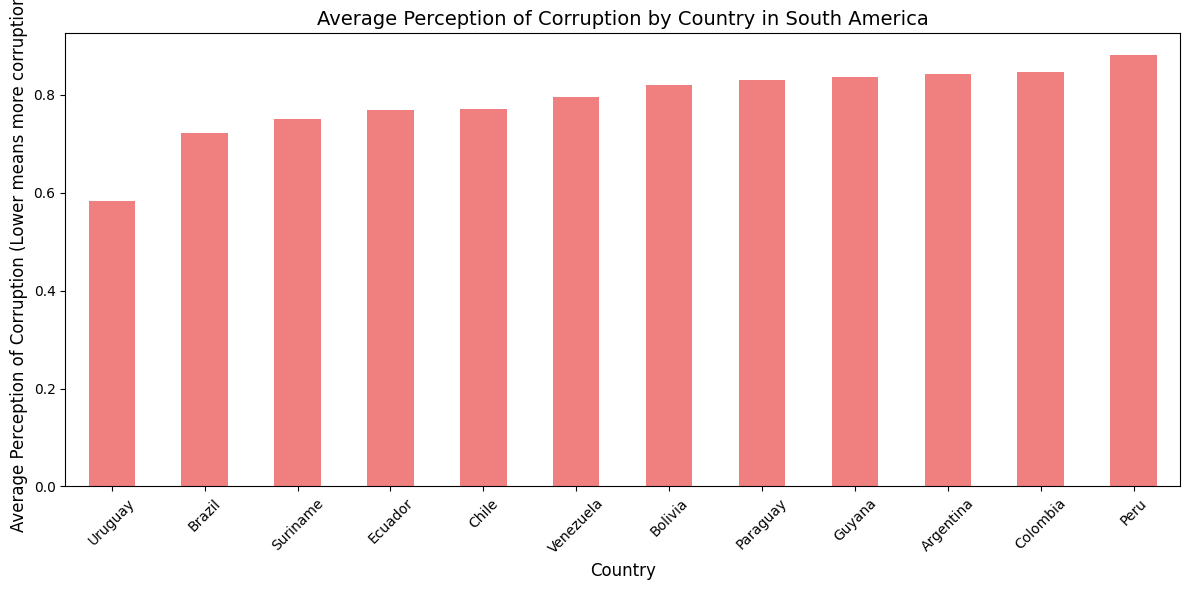

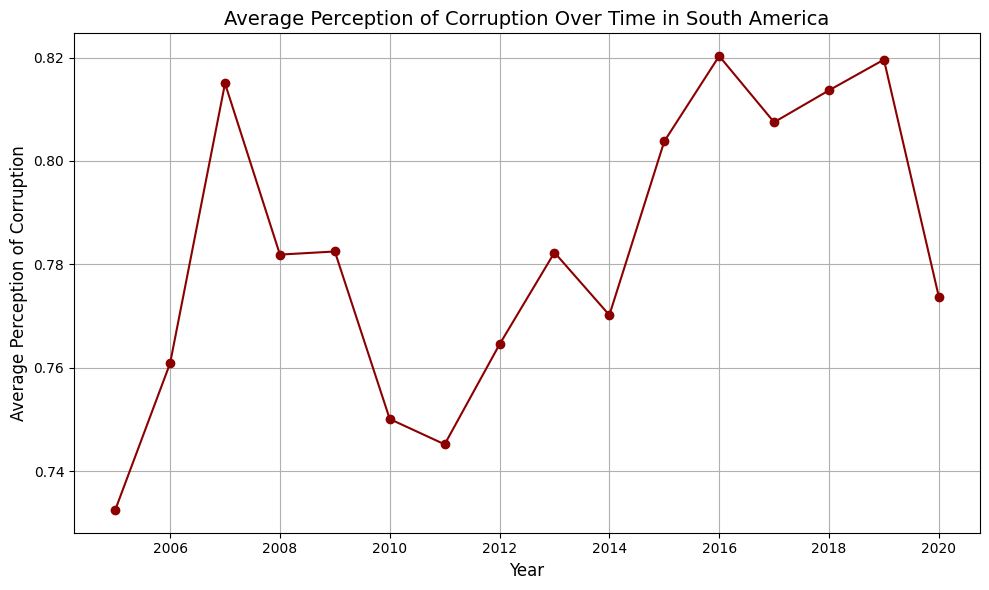

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Summary Statistics for Corruption
corruption_stats = Happiness_South_America['Perception of Corruption'].describe()
print("Descriptive Statistics for Perception of Corruption:")
print(corruption_stats)

# Step 2: Visualization of Corruption by Country
plt.figure(figsize=(12, 6))
corruption_by_country = Happiness_South_America.groupby('Country')['Perception of Corruption'].mean().sort_values()
corruption_by_country.plot(kind='bar', color='lightcoral')

# Adding titles and labels
plt.title('Average Perception of Corruption by Country in South America', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Perception of Corruption (Lower means more corruption)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 3: Corruption Over Time
plt.figure(figsize=(10, 6))
corruption_over_time = Happiness_South_America.groupby('year')['Perception of Corruption'].mean()

# Plotting corruption over time
plt.plot(corruption_over_time.index, corruption_over_time.values, marker='o', color='darkred')
plt.title('Average Perception of Corruption Over Time in South America', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Perception of Corruption', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


#Social support relation with happinness


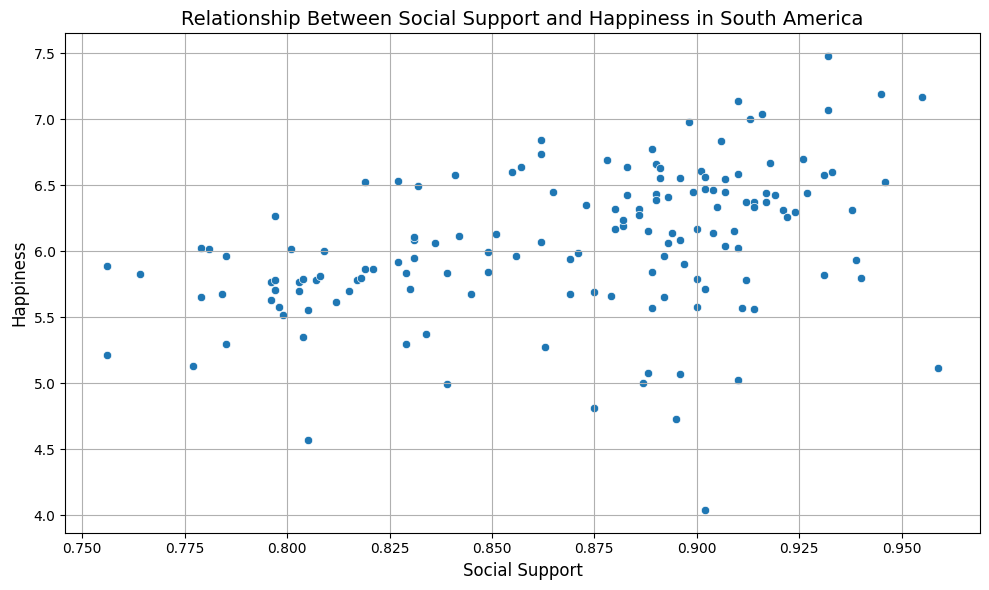

Correlation between Social Support and Happiness: 0.39881870311622225


In [13]:
# Assuming the dataset contains a 'Social support' column
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Scatter Plot to visualize the relationship between Social Support and Happiness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social support', y='Happiness', data=Happiness_South_America)

# Adding titles and labels
plt.title('Relationship Between Social Support and Happiness in South America', fontsize=14)
plt.xlabel('Social Support', fontsize=12)
plt.ylabel('Happiness', fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Correlation Calculation
# Calculating the correlation between Social Support and Happiness
correlation_social_support = Happiness_South_America['Social support'].corr(Happiness_South_America['Happiness'])
print(f"Correlation between Social Support and Happiness: {correlation_social_support}")


#Country wise correlation between social support and Happiness

In [14]:
valid_data = Happiness_South_America.groupby('Country').filter(lambda x: len(x) > 1 and x['Social support'].std() > 0 and x['Happiness'].std() > 0)

# Calculating the correlation between Social Support and Happiness for each country
correlation_by_country = valid_data.groupby('Country').apply(
    lambda x: x['Social support'].corr(x['Happiness'])
)

# Displaying the correlation values by country
print(correlation_by_country)




Country
Argentina    0.353619
Bolivia      0.236771
Brazil       0.588097
Chile        0.300395
Colombia     0.678404
Ecuador     -0.382555
Paraguay     0.120343
Peru        -0.251293
Uruguay      0.330055
Venezuela    0.730268
dtype: float64


<ipython-input-14-893ed009dfe3>:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



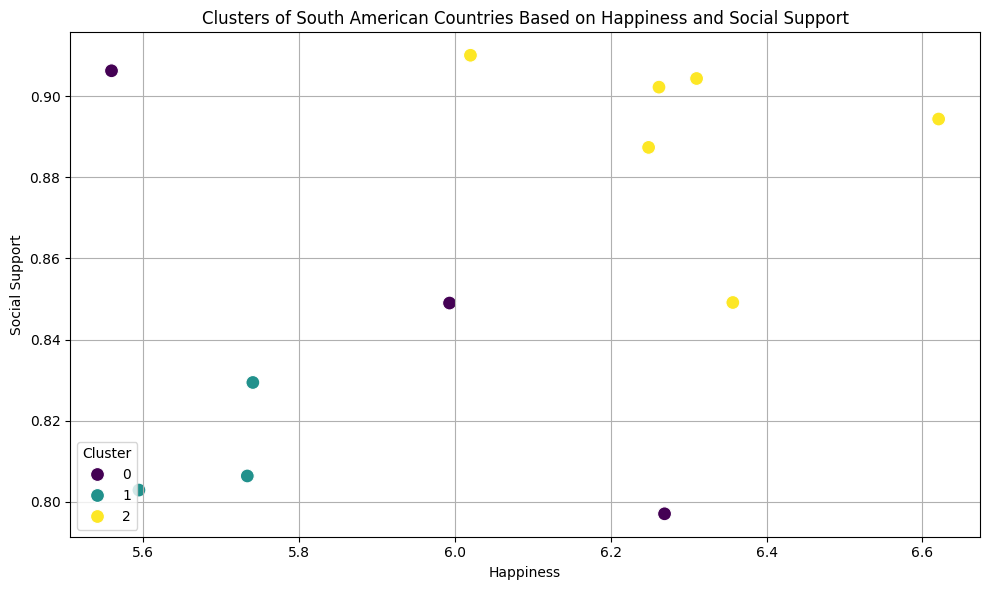


Cluster 2:
['Argentina', 'Brazil', 'Chile', 'Colombia', 'Uruguay', 'Venezuela']

Cluster 1:
['Bolivia', 'Ecuador', 'Peru']

Cluster 0:
['Guyana', 'Paraguay', 'Suriname']


In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for clustering (average happiness and social support per country)
clustering_data = Happiness_South_America.groupby('Country')[['Happiness', 'Social support']].mean()

# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Perform K-Means clustering (try 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Step 2: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Happiness', y='Social support', hue='Cluster', data=clustering_data, palette='viridis', s=100)
plt.title('Clusters of South American Countries Based on Happiness and Social Support')
plt.xlabel('Happiness')
plt.ylabel('Social Support')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Inferences - Print out the countries in each cluster
for cluster in clustering_data['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    print(clustering_data[clustering_data['Cluster'] == cluster].index.tolist())


MLR model for happiness

In [16]:
# Check for missing values in the South American dataset
print(Happiness_South_America.isnull().sum())

Country                         0
year                            0
Happiness                       0
Perception of Corruption        0
Social support                  0
Log GDP per capita              3
Generosity                      6
Freedom to make life choices    0
dtype: int64


In [17]:
# Impute missing values in 'Log GDP per capita' and 'Generosity' with the mean
Happiness_South_America_cleaned = Happiness_South_America.copy()

# Impute missing values
Happiness_South_America_cleaned['Log GDP per capita'].fillna(Happiness_South_America['Log GDP per capita'].mean(), inplace=True)
Happiness_South_America_cleaned['Generosity'].fillna(Happiness_South_America['Generosity'].mean(), inplace=True)

# Check if any null values remain
print(Happiness_South_America_cleaned.isnull().sum())


Country                         0
year                            0
Happiness                       0
Perception of Corruption        0
Social support                  0
Log GDP per capita              0
Generosity                      0
Freedom to make life choices    0
dtype: int64


<ipython-input-17-09ec92385a95>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-17-09ec92385a95>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [18]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd

# Select predictors and target variable
X = Happiness_South_America_cleaned[['Log GDP per capita', 'Perception of Corruption', 'Social support', 'Generosity', 'Freedom to make life choices']]
y = Happiness_South_America_cleaned['Happiness']

# Normalize the predictors using StandardScaler
scaler = StandardScaler()

# Scale the predictors but retain the original index
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# Add a constant (intercept) to the predictors
X_scaled = sm.add_constant(X_scaled)

# Fit the MLR model using statsmodels
mlr_model = sm.OLS(y, X_scaled).fit()

# Print the model summary
print(mlr_model.summary())


                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     24.25
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.27e-17
Time:                        16:07:45   Log-Likelihood:                -77.627
No. Observations:                 149   AIC:                             167.3
Df Residuals:                     143   BIC:                             185.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

###This means that 45.9% of the variability in Happiness is explained by the independent variables (Log GDP per capita, Perception of Corruption, Social support, Generosity, and Freedom to make life choices).
###F-statistic: 24.25
This tests whether the model as a whole is statistically significant.
The high value suggests that the model is significant overall.
Prob (F-statistic): 1.27e-17
This is a very low p-value (close to 0), indicating that the model as a whole is statistically significant. In other words, at least one of the predictors is contributing to explaining happiness.


Argentina, Brazil, Chile, Colombia, Uruguay, Venezuela (High Happiness and High Social Support:)

Countries: Bolivia, Ecuador, Peru (Lower Happiness and Moderate Social Support)

Low Happiness and Low Social Support:
(remaining countries)


In [19]:
pip install gdown

DATASET 2. This is dataset excluding years

In [20]:
# Replace 'your_file.dta' with the path to your Stata file
file_path =  'https://drive.google.com/uc?export=download&id=1uVrERmPTLh0rT6bNXMR6-VLPuK8FspYb'

data_2 = pd.read_csv(file_path)

In [21]:
data_2.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [22]:
# Select the relevant columns and rename 'Life Ladder' to 'Happiness'
Happiness_2 = data_2[['Country name','Ladder score', 'Perceptions of corruption','Explained by: Social support']].copy()

# Rename columns
Happiness_2.rename(columns={'Ladder score': 'Happiness_2', 'Perceptions of corruption': 'Perception of Corruption','Country name':'Country'}, inplace=True)

# Display the first 5 rows of the modified dataset
print(Happiness_2.head())

       Country  Happiness_2  Perception of Corruption  \
0      Finland        7.842                     0.186   
1      Denmark        7.620                     0.179   
2  Switzerland        7.571                     0.292   
3      Iceland        7.554                     0.673   
4  Netherlands        7.464                     0.338   

   Explained by: Social support  
0                         1.106  
1                         1.108  
2                         1.079  
3                         1.172  
4                         1.079  


In [23]:
# List of South American countries
south_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

# Filter the dataset to include only South American countries
Happiness_South_America_2 = Happiness_2[Happiness_2['Country'].isin(south_american_countries)]

# Display the first few rows of the filtered dataset
print(Happiness_South_America_2.head())


      Country  Happiness_2  Perception of Corruption  \
30    Uruguay        6.431                     0.590   
34     Brazil        6.330                     0.756   
42      Chile        6.172                     0.830   
51   Colombia        6.012                     0.841   
56  Argentina        5.929                     0.834   

    Explained by: Social support  
30                         1.042  
34                         0.944  
42                         0.946  
51                         0.866  
56                         0.980  


In [24]:
import gdown

# List of file IDs and corresponding output filenames
files_to_download = [
    ('1zC8IWEJvh27pKiUfEa9VqgMdcEgzbp3M', 'Fertility.csv'),
    ('1OV-4iR324EoSMjjZWzTa-VM3DBoZwgtB', 'GDP_per_capita.csv'),
    ('1VkGtAwtBnf8HKPOTSlswnVsGlqHoia-d', 'Life_expectancy.csv'),
    ('1n9c9A579bRb2ikHtqtmKr2_8cN8KBEUV', 'Meat_Consumption.csv'),
    ('1SMS7uiS4pmJG9nay9LcJAMP9g5cGFHF3', 'Median_age.csv'),
    ('1vDheKnRbFwFbPp8mtrsOl9ZGVj-LKzqq', 'Population_growth.csv'),
    ('1QY8l_WiGEugI4aE-_X1Vy5SVabX5vXuT', 'Sex_Ratio.csv'),
    ('1HO6khjc4eOxQ-DHKZOCR07xZZiz2s4M4', 'Suicide_Rate.csv'),
    ('1WPU-rrrfuxCwLIJzhSmITB14ky_EtCjZ', 'Urbanization_Rate.csv')
]

# Loop to download each file
for file_id, output in files_to_download:
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1zC8IWEJvh27pKiUfEa9VqgMdcEgzbp3M
To: /content/Fertility.csv
100%|██████████| 3.51k/3.51k [00:00<00:00, 8.59MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OV-4iR324EoSMjjZWzTa-VM3DBoZwgtB
To: /content/GDP_per_capita.csv
100%|██████████| 3.69k/3.69k [00:00<00:00, 9.92MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VkGtAwtBnf8HKPOTSlswnVsGlqHoia-d
To: /content/Life_expectancy.csv
100%|██████████| 3.46k/3.46k [00:00<00:00, 9.23MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n9c9A579bRb2ikHtqtmKr2_8cN8KBEUV
To: /content/Meat_Consumption.csv
100%|██████████| 3.48k/3.48k [00:00<00:00, 9.12MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SMS7uiS4pmJG9nay9LcJAMP9g5cGFHF3
To: /content/Median_age.csv
100%|██████████| 4.22k/4.22k [00:00<00:00, 9.12MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vDheKnRbFwFbPp8mtrsOl9ZGVj-LKzqq
To: /content/Population_growth.csv
100%|██████████| 3.91k/3.91k [

In [25]:
import pandas as pd

# List of the CSV file paths
file_paths = [
    'Fertility.csv',
    'GDP_per_capita.csv',
    'Life_expectancy.csv',
    'Meat_Consumption.csv',
    'Median_age.csv',
    'Population_growth.csv',
    'Sex_Ratio.csv',
    'Suicide_Rate.csv',
    'Urbanization_Rate.csv'
]

# Initialize a list to hold the DataFrames
dataframes = []

# Load each CSV file into a DataFrame and append it to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Start with the first DataFrame and merge it with the rest based on 'Country' and 'ISO-code'
merged_df = dataframes[0]
for df in dataframes[1:]:
    # Merge on both 'Country' and 'ISO-code' columns, handling duplicate columns using suffixes
    merged_df = pd.merge(merged_df, df, on=['Country', 'ISO-code'], how='outer', suffixes=('', '_other'))

# Display the merged DataFrame
print(merged_df.head())

# Optionally save the merged DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)



          Country  Fertility ISO-code  GDP per capita  Life expectancy  \
0     Afghanistan        4.5      AFG          2182.0             64.5   
1         Albania        1.6      ALB         14866.0              NaN   
2         Algeria        3.0      DZA         16091.0             76.7   
3  American Samoa        NaN      ASM             NaN              NaN   
4         Andorra        1.3      AND             NaN             81.8   

   Meat consumption  Median age  Population growth  Sex-ratio  Suicide rate  \
0              17.3        27.4               2.41       1.03           6.4   
1               NaN        32.9               0.26       0.98           5.6   
2              18.3        28.1               1.89       1.03           3.3   
3              24.9        25.5              -0.26       1.00           NaN   
4               NaN        44.3               0.63       1.06           NaN   

   Urbanization rate  
0               26.0  
1               62.1  
2          

In [26]:
merged_df.head()

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate
0,Afghanistan,4.5,AFG,2182.0,64.5,17.3,27.4,2.41,1.03,6.4,26.0
1,Albania,1.6,ALB,14866.0,NaN,NaN,32.9,0.26,0.98,5.6,62.1
2,Algeria,3.0,DZA,16091.0,76.7,18.3,28.1,1.89,1.03,3.3,73.7
3,American Samoa,NaN,ASM,NaN,NaN,24.9,25.5,-0.26,1.00,NaN,87.2
4,Andorra,1.3,AND,NaN,81.8,NaN,44.3,0.63,1.06,NaN,87.9


In [27]:
# List of South American countries
south_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

# Filter the merged DataFrame for South American countries only
south_america_df = merged_df[merged_df['Country'].isin(south_american_countries)]


In [28]:
south_america_df.head()

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate
8,Argentina,2.3,ARG,19971.0,76.5,79.7,31.7,0.88,0.98,9.1,92.1
23,Bolivia,2.7,BOL,8525.0,71.2,50.0,24.3,1.65,0.98,12.9,70.1
26,Brazil,1.7,BRA,17106.0,75.7,82.4,32.6,0.87,0.97,6.1,87.1
39,Chile,1.6,CHL,27150.0,80.0,66.4,34.4,0.90,0.97,9.7,87.7
41,Colombia,1.8,COL,16265.0,77.1,33.9,30.0,1.32,0.98,7.0,81.4


In [29]:
# Assuming Happiness_South_America is already loaded and available as a DataFrame

# Merge the two DataFrames on 'Country'
final_merged_df_2= pd.merge(south_america_df, Happiness_South_America_2, on='Country', how='inner')


In [30]:
final_merged_df_2.head()

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Happiness_2,Perception of Corruption,Explained by: Social support
0,Argentina,2.3,ARG,19971.0,76.5,79.7,31.7,0.88,0.98,9.1,92.1,5.929,0.834,0.980
1,Bolivia,2.7,BOL,8525.0,71.2,50.0,24.3,1.65,0.98,12.9,70.1,5.716,0.839,0.782
2,Brazil,1.7,BRA,17106.0,75.7,82.4,32.6,0.87,0.97,6.1,87.1,6.330,0.756,0.944
3,Chile,1.6,CHL,27150.0,80.0,66.4,34.4,0.90,0.97,9.7,87.7,6.172,0.830,0.946
4,Colombia,1.8,COL,16265.0,77.1,33.9,30.0,1.32,0.98,7.0,81.4,6.012,0.841,0.866


Before Regression models wanted to focus on finding relationship between variables
0) Continent wise comparison
1) URBANIZATION RATE AND SUICIDE     (urbanization rate is shift of popn from rural to urban areas)
2) Sex ratio by gdp per capita
3) Meat consumption and happiness

Average life expactancy

In [31]:
import plotly.express as px

# Sort the DataFrame by life expectancy for better visualization
final_merged_df_2_sorted = final_merged_df_2.sort_values(by='Life expectancy', ascending=False)

# Create an interactive bar plot for life expectancy by country
fig = px.bar(final_merged_df_2_sorted,
             x='Life expectancy',
             y='Country',
             orientation='h',
             title='Life Expectancy by Country in South America',
             labels={'Life expectancy':'Life Expectancy (years)', 'Country':'Country'},
             text='Life expectancy')

# Customize the layout for better readability
fig.update_layout(xaxis_title='Life Expectancy (years)',
                  yaxis_title='Country',
                  title_x=0.5,
                  height=600)

# Show the interactive plot
fig.show()


Trend Analysis

1) Urbanization rate and suicide in south american countries

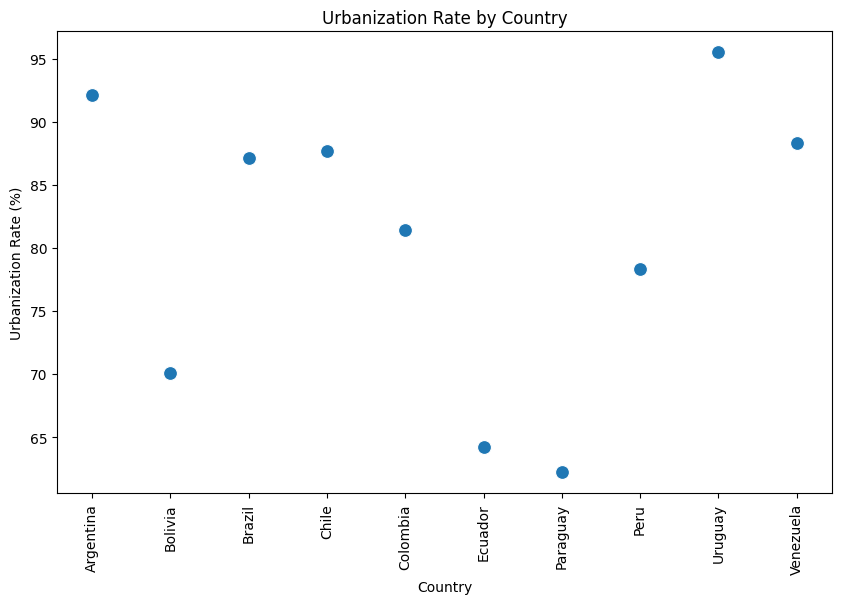

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with Urbanization Rate for each country
plt.figure(figsize=(10, 6))

# Scatter plot for Urbanization Rate by Country
sns.scatterplot(x='Country', y='Urbanization rate', data=final_merged_df_2, s=100)

plt.title('Urbanization Rate by Country')
plt.xlabel('Country')
plt.ylabel('Urbanization Rate (%)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
plt.show()


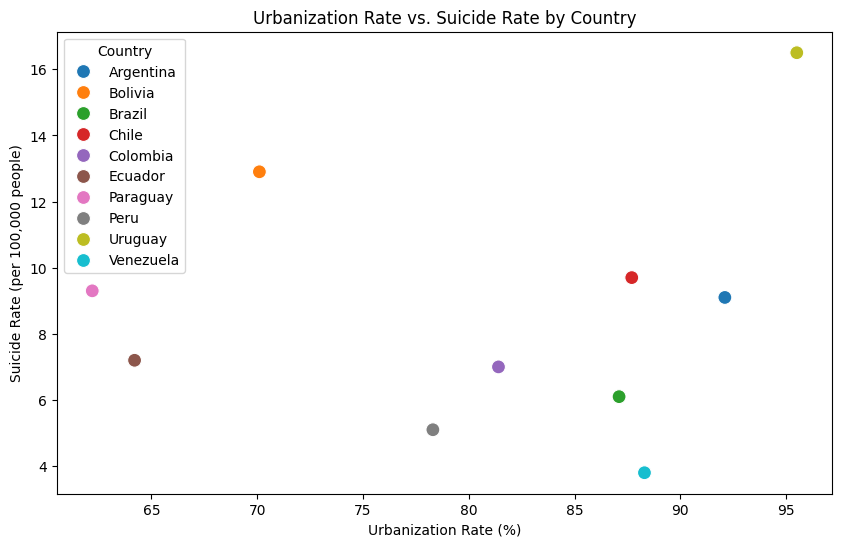

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between Urbanization Rate and Suicide Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Urbanization rate', y='Suicide rate', data=final_merged_df_2, hue='Country', s=100)
plt.title('Urbanization Rate vs. Suicide Rate by Country')
plt.xlabel('Urbanization Rate (%)')
plt.ylabel('Suicide Rate (per 100,000 people)')
plt.show()


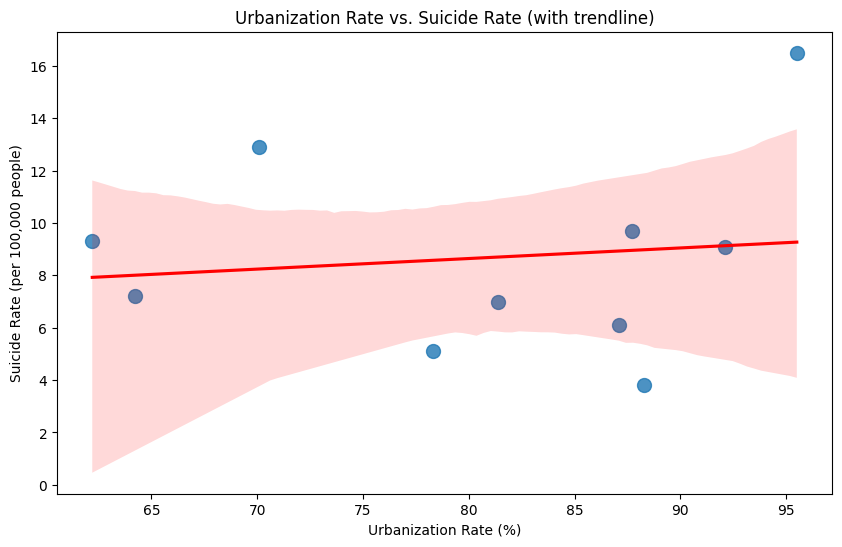

In [33]:
# Scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Urbanization rate', y='Suicide rate', data=final_merged_df_2, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Urbanization Rate vs. Suicide Rate (with trendline)')
plt.xlabel('Urbanization Rate (%)')
plt.ylabel('Suicide Rate (per 100,000 people)')
plt.show()


# All countries

In [34]:
# Pearson correlation coefficient
correlation = merged_df[['Urbanization rate', 'Suicide rate']].corr()
print("Correlation between Urbanization Rate and Suicide Rate:\n", correlation)


Correlation between Urbanization Rate and Suicide Rate:
                    Urbanization rate  Suicide rate
Urbanization rate           1.000000      0.047991
Suicide rate                0.047991      1.000000


In [35]:
# Pearson correlation coefficient
correlation = final_merged_df_2[['Urbanization rate', 'Suicide rate']].corr()
print("Correlation between Urbanization Rate and Suicide Rate:\n", correlation)  # south american countries


Correlation between Urbanization Rate and Suicide Rate:
                    Urbanization rate  Suicide rate
Urbanization rate           1.000000      0.124838
Suicide rate                0.124838      1.000000


# Meat consumption and Happiness

In [37]:
final_merged_df_2.head()

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Happiness_2,Perception of Corruption,Explained by: Social support
0,Argentina,2.3,ARG,19971.0,76.5,79.7,31.7,0.88,0.98,9.1,92.1,5.929,0.834,0.980
1,Bolivia,2.7,BOL,8525.0,71.2,50.0,24.3,1.65,0.98,12.9,70.1,5.716,0.839,0.782
2,Brazil,1.7,BRA,17106.0,75.7,82.4,32.6,0.87,0.97,6.1,87.1,6.330,0.756,0.944
3,Chile,1.6,CHL,27150.0,80.0,66.4,34.4,0.90,0.97,9.7,87.7,6.172,0.830,0.946
4,Colombia,1.8,COL,16265.0,77.1,33.9,30.0,1.32,0.98,7.0,81.4,6.012,0.841,0.866


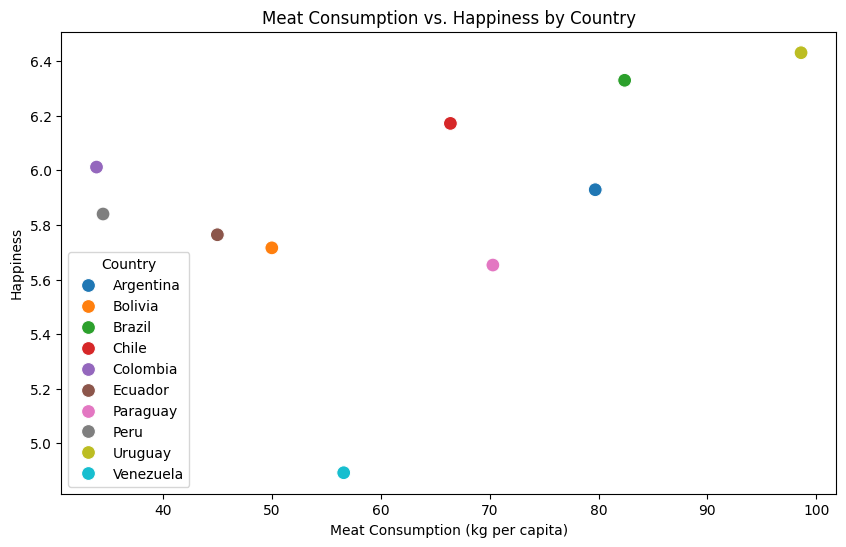

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between Meat Consumption and Happiness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Meat consumption', y='Happiness_2', data=final_merged_df_2, hue='Country', s=100)
plt.title('Meat Consumption vs. Happiness by Country')
plt.xlabel('Meat Consumption (kg per capita)')
plt.ylabel('Happiness')
plt.show()


In [38]:
# Calculate the Pearson correlation coefficient
correlation = final_merged_df_2[['Meat consumption', 'Happiness_2']].corr()

# Display the correlation value
print("Correlation between Meat Consumption and Happiness:\n", correlation)


Correlation between Meat Consumption and Happiness:
                   Meat consumption  Happiness_2
Meat consumption          1.000000     0.433497
Happiness_2               0.433497     1.000000
